In [21]:
import numpy as np
import pandas as pd

n_samples = 1000
n_features = 5

#Генеруємо випадкові дані для ознак
X = np.random.rand(n_samples, n_features)

#Генеруємо випадкові мітки (0 або 1 для класифікації)
y = np.random.randint(2, size=n_samples)

df = pd.DataFrame(X, columns=[f'Feature_{i}' for i in range(n_features)])
df['Target'] = y

df.to_csv('generated_dataset.csv', index=False)
print("Згенерований набір даних збережено у файл 'generated_dataset.csv'.")

Згенерований набір даних збережено у файл 'generated_dataset.csv'.


Генерація набору даних 

Точність моделі: 0.50


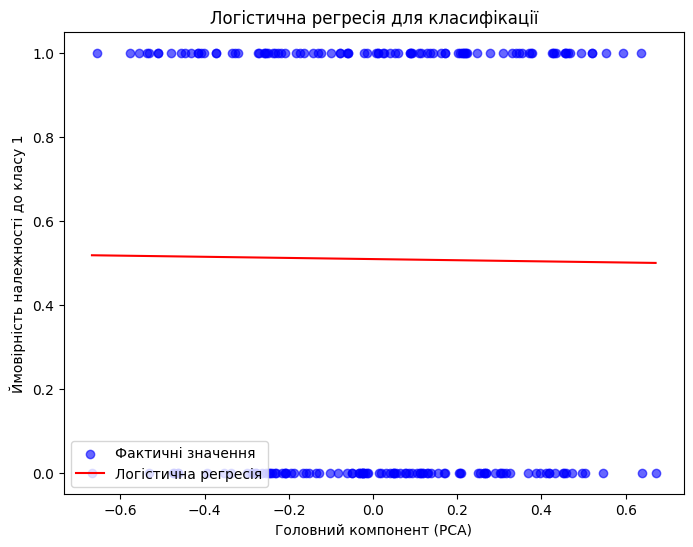

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

#Завантажуємо дані згенеровані раніше
df = pd.read_csv('generated_dataset.csv')

#Розподіляємо дані на ознаки (X) та мітки (y)
X = df.drop(columns='Target')
y = df['Target']

#Застосовуємо PCA для зменшення кількості вимірів до 1, щоб візуалізувати на 2D-графіку
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

#Розділяємо на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

#Створюємо модель логістичної регресії
model = LogisticRegression()

#Навчання моделі
model.fit(X_train, y_train)

#Прогнозування ймовірностей
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Отримуємо ймовірність належності до класу 1

#Оцінка точності моделі
accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"Точність моделі: {accuracy:.2f}")

# Графік логістичної регресії
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', label='Фактичні значення', alpha=0.6)

# Побудова сигмоподібної лінії для логістичної регресії
X_test_sorted = np.sort(X_test, axis=0)  # Сортуємо дані для побудови плавної лінії
y_pred_prob_sorted = model.predict_proba(X_test_sorted)[:, 1]
plt.plot(X_test_sorted, y_pred_prob_sorted, color='red', label='Логістична регресія')

plt.title('Логістична регресія для класифікації')
plt.xlabel('Головний компонент (PCA)')
plt.ylabel('Ймовірність належності до класу 1')
plt.legend(loc='best')
plt.show()

Візуалізація регресії для власного набору даних

   Age  Na_to_K  Sex_M  BP_LOW  BP_NORMAL  Cholesterol_NORMAL
0   23   25.355  False   False      False               False
1   47   13.093   True    True      False               False
2   47   10.114   True    True      False               False
3   28    7.798  False   False       True               False
4   61   18.043  False    True      False               False
Точність моделі: 0.38


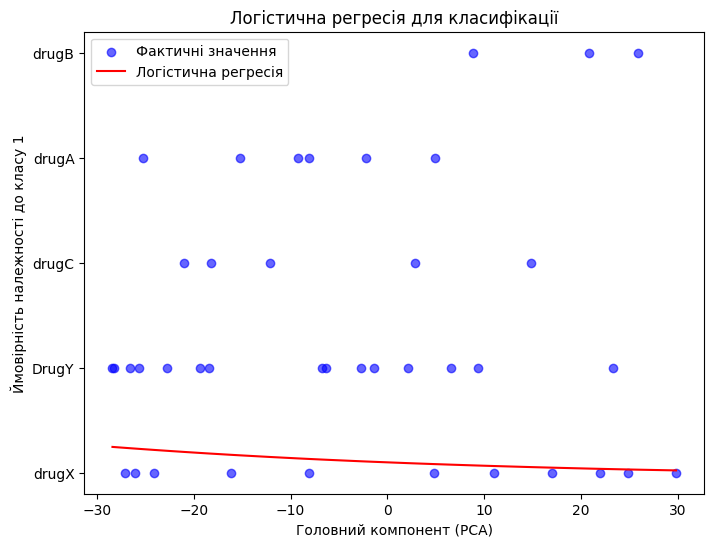

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder

#Завантажуємо дані
df = pd.read_csv('drug200.csv')

#Розподіляємо дані на ознаки (X) та мітки (y)
X = df.drop(columns='Drug')
y = df['Drug']

#Застосовуємо One-Hot Encoding для категоріальних даних
X = pd.get_dummies(X, drop_first=True)

#Перевіряємо, що всі категоріальні значення закодовані
print(X.head())

#Застосовуємо PCA для зменшення кількості вимірів до 1 для візуалізації
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

#Розділяємо на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

#Створюємо модель логістичної регресії
model = LogisticRegression()

#Навчання моделі
model.fit(X_train, y_train)

#Прогнозування ймовірностей
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Отримуємо ймовірність належності до класу 1

#Оцінка точності моделі
accuracy = accuracy_score(y_test, model.predict(X_test))
print(f"Точність моделі: {accuracy:.2f}")

#Візуалізація результатів
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue', label='Фактичні значення', alpha=0.6)

#Побудова сигмоподібної лінії для логістичної регресії
X_test_sorted = np.sort(X_test, axis=0)  #Сортуємо дані для побудови плавної лінії
y_pred_prob_sorted = model.predict_proba(X_test_sorted)[:, 1]
plt.plot(X_test_sorted, y_pred_prob_sorted, color='red', label='Логістична регресія')

plt.title('Логістична регресія для класифікації')
plt.xlabel('Головний компонент (PCA)')
plt.ylabel('Ймовірність належності до класу 1')
plt.legend(loc='best')
plt.show()

Візуалізація регресії для викачаного набору даних